In [1]:
import numpy as np
import itertools
import matplotlib.cm as cm
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture


total_colores=10
palette=iter(cm.rainbow(np.linspace(0,1,total_colores)))


def plot_contour(model,xmin=-10,xmax=10):
    #Model tiene que tener la opción de calculo el valor de verosimilitud (score_samples)
    x = np.arange(xmin, xmax, .1)
    y = np.arange(xmin, xmax, .1)
    [xv, yv] = np.meshgrid(x, y)
    A=np.concatenate([np.expand_dims(xv.flatten(),axis=1),np.expand_dims(yv.flatten(),axis=1)],axis=1)
    plt.contourf(x,y,np.reshape(model.score_samples(A),[len(x),len(y)]),50,cmap='RdGy')



# Genera datos aleatorios con dos componentes
np.random.seed(0)
n_muestras = 500
C = np.eye(2)
X = np.r_[np.dot(np.random.randn(n_muestras, 2), C)+np.array([5, 5]),.7 * np.random.randn(n_muestras, 2) + np.array([-6, 3]),np.array([-3, -6])+np.dot(np.random.randn(n_muestras, 2), C)]


#Mezcla de Gaussianas estimadas por EM
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X)




GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

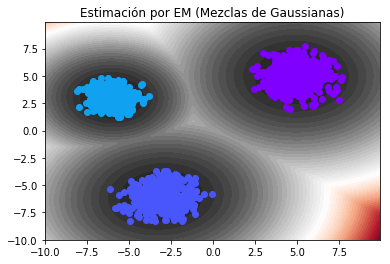

In [2]:

plot_contour(gmm)
labelpred=gmm.predict(X)
for i in np.unique(labelpred):
    plt.scatter(X[labelpred==i,0],X[labelpred==i,1],color=next(palette))
plt.title('Estimación por EM (Mezclas de Gaussianas)')
plt.show()

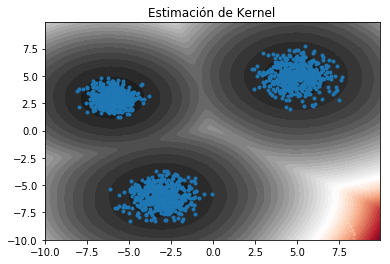

In [3]:
#Comparación con Estimación No-paramátrica por Nucleo
from sklearn.neighbors.kde import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)
plot_contour(kde)
plt.title('Estimación de Kernel')
plt.plot(X[:,0],X[:,1],'.')
plt.show()